Data Exploration and Preprocessing

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8960,57,Local-gov,339163,Some-college,10,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,Mexico,<=50K
8961,59,Self-emp-not-inc,124771,Bachelors,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,30,United-States,<=50K
8962,32,Private,167531,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,Asian-Pac-Islander,Female,15024,0,50,United-States,>50K
8963,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K


In [3]:
df.shape

(8965, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8965 entries, 0 to 8964
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             8965 non-null   int64 
 1   workclass       8965 non-null   object
 2   fnlwgt          8965 non-null   int64 
 3   education       8965 non-null   object
 4   education_num   8965 non-null   int64 
 5   marital_status  8965 non-null   object
 6   occupation      8965 non-null   object
 7   relationship    8965 non-null   object
 8   race            8965 non-null   object
 9   sex             8965 non-null   object
 10  capital_gain    8965 non-null   int64 
 11  capital_loss    8965 non-null   int64 
 12  hours_per_week  8965 non-null   int64 
 13  native_country  8965 non-null   object
 14  income          8965 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.0+ MB


In [5]:
df.duplicated().sum()

np.int64(2)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,8963.000000,8.963000e+03,8963.000000,8963.000000,8963.000000,8963.000000
mean,38.438469,1.902471e+05,10.075979,1070.305590,89.207631,40.548589
std,13.564762,1.060736e+05,2.543688,7342.082959,404.080197,12.326554
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.179450e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.786150e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.384150e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.226583e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


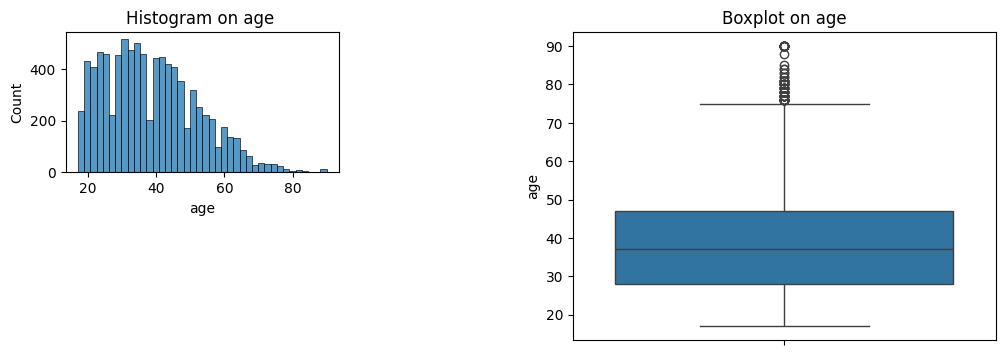

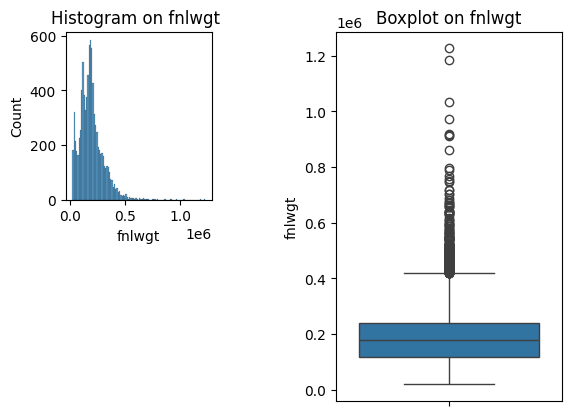

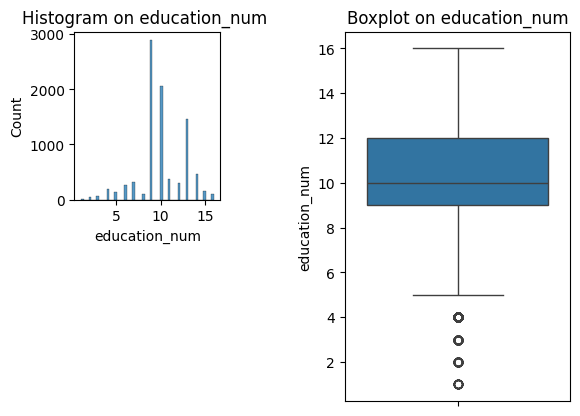

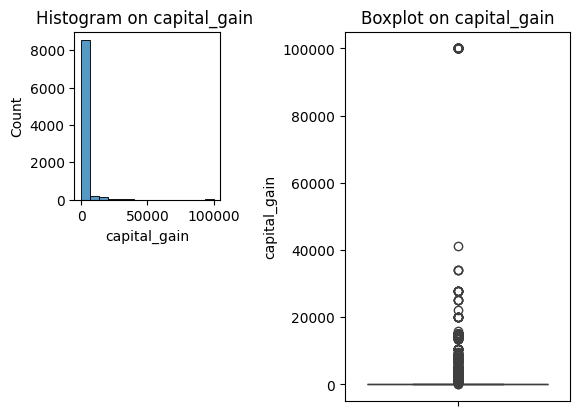

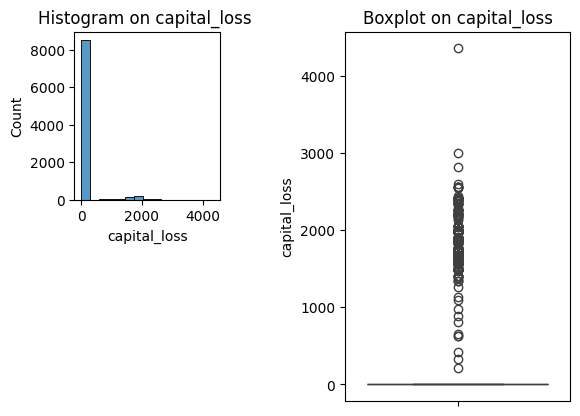

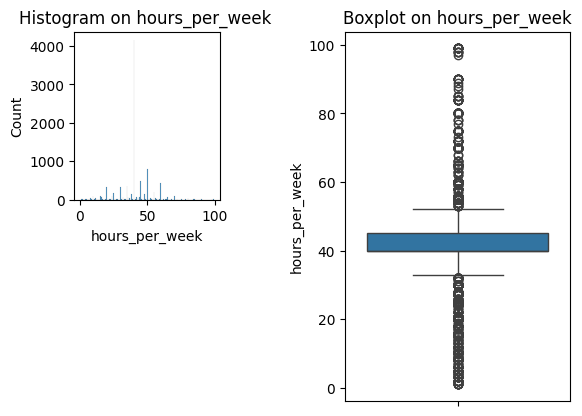

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_col = df.select_dtypes(include = np.number).columns

# histgrom
plt.figure(figsize = (12,4))
for col in (numerical_col):
    plt.subplot(2,3,1)
    sns.histplot(df[col])
    plt.title(f'Histogram on {col} ')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.title(f'Boxplot on {col}')

    plt.tight_layout()
    plt.show()

In [10]:
# standard scaling

from sklearn.preprocessing import StandardScaler
scalr = StandardScaler()
numeric = df.select_dtypes(include = np.number).columns
df[numeric] = scalr.fit_transform(df[numeric])
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.041399,State-gov,-1.062822,Bachelors,1.149584,Never-married,Adm-clerical,Not-in-family,White,Male,0.150333,-0.220779,-0.044507,United-States,<=50K
1,0.852368,Self-emp-not-inc,-1.008187,Bachelors,1.149584,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145785,-0.220779,-2.235022,United-States,<=50K
2,-0.032326,Private,0.239459,HS-grad,-0.423023,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145785,-0.220779,-0.044507,United-States,<=50K
3,1.073542,Private,0.419297,11th,-1.209327,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145785,-0.220779,-0.044507,United-States,<=50K
4,-0.769571,Private,1.396862,Bachelors,1.149584,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145785,-0.220779,-0.044507,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8960,1.368440,Local-gov,1.403971,Some-college,-0.029871,Widowed,Adm-clerical,Unmarried,White,Female,-0.145785,-0.220779,-0.044507,Mexico,<=50K
8961,1.515889,Self-emp-not-inc,-0.617305,Bachelors,1.149584,Married-civ-spouse,Farming-fishing,Husband,White,Male,-0.145785,-0.220779,-0.855809,United-States,<=50K
8962,-0.474673,Private,-0.214166,Prof-school,1.935888,Married-civ-spouse,Prof-specialty,Wife,Asian-Pac-Islander,Female,1.900615,-0.220779,0.766795,United-States,>50K
8963,3.801350,?,-1.067187,HS-grad,-0.423023,Widowed,?,Not-in-family,White,Female,-0.145785,10.559860,-0.044507,United-States,<=50K


In [11]:
# MinMax Scaling ( Normalization )

from sklearn.preprocessing import MinMaxScaler
m_scalr = MinMaxScaler()
m_number = df.select_dtypes(include = np.number).columns
df[m_number] = m_scalr.fit_transform(df[m_number])
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.048219,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.053019,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.162633,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.178433,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.264319,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8960,0.547945,Local-gov,0.264943,Some-college,0.600000,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,Mexico,<=50K
8961,0.575342,Self-emp-not-inc,0.087361,Bachelors,0.800000,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,0.295918,United-States,<=50K
8962,0.205479,Private,0.122779,Prof-school,0.933333,Married-civ-spouse,Prof-specialty,Wife,Asian-Pac-Islander,Female,0.150242,0.0,0.500000,United-States,>50K
8963,1.000000,?,0.047836,HS-grad,0.533333,Widowed,?,Not-in-family,White,Female,0.000000,1.0,0.397959,United-States,<=50K


In [12]:
'''
1. StandardScaler

.  StandardScaler transform the data into a fixed range is -3 to +3
.  Works best when data follows a Gaussian (normal) distribution
.  When the data follows a normal distribution or close to it
.  When the variance of features is important

2. MinMaxScalre

.  Min-Max Scaling transforms the data into a fixed range, typically between 0 and 1
.  Min-Max scaling makes sure that each feature contributes equally to the calculation.
.  For algorithms that rely on distance calculations
.  Best for distance-based models and when data needs to be within a specific range
'''

'\n1. StandardScaler\n\n.  StandardScaler transform the data into a fixed range is -3 to +3\n.  Works best when data follows a Gaussian (normal) distribution\n.  When the data follows a normal distribution or close to it\n.  When the variance of features is important\n\n2. MinMaxScalre\n\n.  Min-Max Scaling transforms the data into a fixed range, typically between 0 and 1\n.  Min-Max scaling makes sure that each feature contributes equally to the calculation.\n.  For algorithms that rely on distance calculations\n.  Best for distance-based models and when data needs to be within a specific range\n'

Encoding Techniques

In [13]:
df1 = df.copy()

In [14]:
# Label Encoding the data

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

# apply  label encoding columns with more than 5 categories

for col in ['workclass','education','marital_status','occupation','relationship','race','native_country','income']:
    df1[col] = label.fit_transform(df1[col])
df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,7,0.048219,9,0.800000,4,1,1,4,Male,0.021740,0.0,0.397959,38,1
1,0.452055,6,0.053019,9,0.800000,2,4,0,4,Male,0.000000,0.0,0.122449,38,1
2,0.287671,4,0.162633,11,0.533333,0,6,1,4,Male,0.000000,0.0,0.397959,38,1
3,0.493151,4,0.178433,1,0.400000,2,6,0,2,Male,0.000000,0.0,0.397959,38,1
4,0.150685,4,0.264319,9,0.800000,2,10,5,2,Female,0.000000,0.0,0.397959,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8960,0.547945,2,0.264943,15,0.600000,6,1,4,4,Female,0.000000,0.0,0.397959,25,1
8961,0.575342,6,0.087361,9,0.800000,2,5,0,4,Male,0.000000,0.0,0.295918,38,1
8962,0.205479,4,0.122779,14,0.933333,2,10,5,1,Female,0.150242,0.0,0.500000,38,2
8963,1.000000,0,0.047836,11,0.533333,6,0,1,4,Female,0.000000,1.0,0.397959,38,1


In [15]:
# Generate a dummy variables for sex column

df1_dummies = pd.get_dummies(df1['sex'],dtype =int)

# drop the sex variable and concat the dummy variables

df1=pd.concat([df1.drop(columns = ['sex']),df1_dummies],axis = 1)
df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,Female,Male
0,0.301370,7,0.048219,9,0.800000,4,1,1,4,0.021740,0.0,0.397959,38,1,0,1
1,0.452055,6,0.053019,9,0.800000,2,4,0,4,0.000000,0.0,0.122449,38,1,0,1
2,0.287671,4,0.162633,11,0.533333,0,6,1,4,0.000000,0.0,0.397959,38,1,0,1
3,0.493151,4,0.178433,1,0.400000,2,6,0,2,0.000000,0.0,0.397959,38,1,0,1
4,0.150685,4,0.264319,9,0.800000,2,10,5,2,0.000000,0.0,0.397959,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8960,0.547945,2,0.264943,15,0.600000,6,1,4,4,0.000000,0.0,0.397959,25,1,1,0
8961,0.575342,6,0.087361,9,0.800000,2,5,0,4,0.000000,0.0,0.295918,38,1,0,1
8962,0.205479,4,0.122779,14,0.933333,2,10,5,1,0.150242,0.0,0.500000,38,2,1,0
8963,1.000000,0,0.047836,11,0.533333,6,0,1,4,0.000000,1.0,0.397959,38,1,1,0


In [16]:
#  some correction
df1.columns = [col.replace(' Female', 'Female') for col in df1.columns]
df1.columns = [col.replace(' Male', 'Male') for col in df1.columns]

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8963 entries, 0 to 8964
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             8963 non-null   float64
 1   workclass       8963 non-null   int64  
 2   fnlwgt          8963 non-null   float64
 3   education       8963 non-null   int64  
 4   education_num   8963 non-null   float64
 5   marital_status  8963 non-null   int64  
 6   occupation      8963 non-null   int64  
 7   relationship    8963 non-null   int64  
 8   race            8963 non-null   int64  
 9   capital_gain    8963 non-null   float64
 10  capital_loss    8963 non-null   float64
 11  hours_per_week  8963 non-null   float64
 12  native_country  8963 non-null   int64  
 13  income          8963 non-null   int64  
 14  Female          8963 non-null   int64  
 15  Male            8963 non-null   int64  
dtypes: float64(6), int64(10)
memory usage: 1.2 MB


In [18]:
'''
1. Use Label Encoding:
.  Label Encoding assigns each unique category in a feature to an integer value.
.  For ordinal data where the categories have a clear, meaningful order (e.g., Low, Medium, High).
.  When dealing with high-cardinality features (i.e., features with many unique categories) and when you need to avoid high-dimensionality
.  Label Encoding is simpler and more memory efficient but should be avoided for nominal categories,
   as it could mislead the model into assuming an ordinal relationship

2. One-Hot Encoding :
.  One-Hot Encoding transforms each category into a new binary column (0 or 1). For a categorical feature with n unique values,
   One-Hot Encoding creates n binary columns.
.  Since each category gets its own binary column, models don’t treat the data as ordinal, avoiding potential misinterpretation.
.  For nominal data where there is no inherent ordering between categories
.  One-Hot Encoding avoids such misinterpretation, making it more suitable for nominal data but can lead to increased dimensionality,
   which might become computationally expensive for features with many categories.
'''

'\n1. Use Label Encoding:\n.  Label Encoding assigns each unique category in a feature to an integer value.\n.  For ordinal data where the categories have a clear, meaningful order (e.g., Low, Medium, High).\n.  When dealing with high-cardinality features (i.e., features with many unique categories) and when you need to avoid high-dimensionality\n.  Label Encoding is simpler and more memory efficient but should be avoided for nominal categories,\n   as it could mislead the model into assuming an ordinal relationship\n\n2. One-Hot Encoding :\n.  One-Hot Encoding transforms each category into a new binary column (0 or 1). For a categorical feature with n unique values,\n   One-Hot Encoding creates n binary columns.\n.  Since each category gets its own binary column, models don’t treat the data as ordinal, avoiding potential misinterpretation.\n.  For nominal data where there is no inherent ordering between categories\n.  One-Hot Encoding avoids such misinterpretation, making it more suit

Feature Engineering

In [19]:
df2 = df1.copy()

In [20]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df2, features):
    vif = pd.DataFrame()
    vif["Features"] = features
    vif["VIF"] = [variance_inflation_factor(df2[features].values, i) for i in range(df2[features].shape[1])]
    return vif

# Updated list of features
features = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country','Female','Male']

# Calculate VIF for df2
vif_data = calculate_vif(df2, features)
vif_data

,Features,VIF
0,age,1.153002
1,workclass,1.097178
2,fnlwgt,1.013415
3,education,1.154736
4,education_num,1.211498
5,marital_status,1.123769
6,occupation,1.099937
7,relationship,1.647112
8,race,1.036479
9,capital_gain,1.027368


In [22]:
#New Features from High-VIF Variables
'''
1. Socioeconomic Index
Formula: ##socioeconomic_index = workclass * education_num
Rationale: Workclass and education are often related to socioeconomic status.
Combining them could help capture this relationship while reducing multicollinearity with individual variables.
2. Cultural Diversity Impact
Formula: ##cultural_diversity = race * native_country##
Rationale: Race and native country together might capture the influence of cultural diversity in the dataset.
This feature could be particularly relevant if these attributes have joint effects on income or other target variables.
'''

'\n1. Socioeconomic Index\nFormula: ##socioeconomic_index = workclass * education_num\nRationale: Workclass and education are often related to socioeconomic status.\nCombining them could help capture this relationship while reducing multicollinearity with individual variables.\n2. Cultural Diversity Impact\nFormula: ##cultural_diversity = race * native_country##\nRationale: Race and native country together might capture the influence of cultural diversity in the dataset.\nThis feature could be particularly relevant if these attributes have joint effects on income or other target variables.\n'

In [23]:
# Assuming 'Male' is the column for males and 'Female' is dropped
df2['is_female'] = df2['Female']

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df2, features):
    vif = pd.DataFrame()
    vif["Features"] = features
    vif["VIF"] = [variance_inflation_factor(df2[features].values, i) for i in range(df2[features].shape[1])]
    return vif

# Updated list of features
features = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country','is_female']

# Calculate VIF for df2
vif_data = calculate_vif(df2, features)
vif_data

,Features,VIF
0,age,3.670215
1,workclass,8.311210
2,fnlwgt,3.428485
3,education,9.225752
4,education_num,15.636094
5,marital_status,3.978775
6,occupation,3.701387
7,relationship,2.847386
8,race,16.782188
9,capital_gain,1.045641


In [25]:
df2['socioeconomic_index'] = df2['workclass'] * df2['education_num']
df2['cultural_diversity'] = df2['race'] * df2['native_country']
df2.drop(columns=['workclass', 'education_num', 'race', 'native_country','Female', 'Male'], inplace=True)
df2

,age,fnlwgt,education,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,income,is_female,socioeconomic_index,cultural_diversity
0,0.301370,0.048219,9,4,1,1,0.021740,0.0,0.397959,1,0,5.600000,152
1,0.452055,0.053019,9,2,4,0,0.000000,0.0,0.122449,1,0,4.800000,152
2,0.287671,0.162633,11,0,6,1,0.000000,0.0,0.397959,1,0,2.133333,152
3,0.493151,0.178433,1,2,6,0,0.000000,0.0,0.397959,1,0,1.600000,76
4,0.150685,0.264319,9,2,10,5,0.000000,0.0,0.397959,1,1,3.200000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8960,0.547945,0.264943,15,6,1,4,0.000000,0.0,0.397959,1,1,1.200000,100
8961,0.575342,0.087361,9,2,5,0,0.000000,0.0,0.295918,1,0,4.800000,152
8962,0.205479,0.122779,14,2,10,5,0.150242,0.0,0.500000,2,1,3.733333,38
8963,1.000000,0.047836,11,6,0,1,0.000000,1.0,0.397959,1,1,0.000000,152


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df2, features):
    vif = pd.DataFrame()
    vif["Features"] = features
    vif["VIF"] = [variance_inflation_factor(df2[features].values, i) for i in range(df2[features].shape[1])]
    return vif

# Updated list of features
features = ['age', 'fnlwgt', 'education','marital_status', 'occupation', 'relationship', 'capital_gain',
       'capital_loss', 'hours_per_week','is_female','socioeconomic_index','cultural_diversity']

# Calculate VIF for df2
vif_data = calculate_vif(df2, features)
vif_data

,Features,VIF
0,age,3.433718
1,fnlwgt,3.336547
2,education,7.732783
3,marital_status,3.727036
4,occupation,3.551101
5,relationship,2.795291
6,capital_gain,1.041502
7,capital_loss,1.062521
8,hours_per_week,9.483036
9,is_female,2.258331


In [27]:
#log transformation
# Apply log1p transformation to reduce skewness for highly skewed features
df2['capital_gain_log'] = np.log1p(df2['capital_gain'])
df2['capital_loss_log'] = np.log1p(df2['capital_loss'])

# Calculate skewness for transformed features
transformed_skewness = df2[['capital_gain_log', 'capital_loss_log']].skew()

# Display the results
print("Skewness after transformation:")
print(transformed_skewness)

Skewness after transformation:
capital_gain_log    10.670905
capital_loss_log     4.390264
dtype: float64


In [28]:
df2.drop(columns=['capital_gain','capital_loss'], inplace = True)
df2

,age,fnlwgt,education,marital_status,occupation,relationship,hours_per_week,income,is_female,socioeconomic_index,cultural_diversity,capital_gain_log,capital_loss_log
0,0.301370,0.048219,9,4,1,1,0.397959,1,0,5.600000,152,0.021507,0.000000
1,0.452055,0.053019,9,2,4,0,0.122449,1,0,4.800000,152,0.000000,0.000000
2,0.287671,0.162633,11,0,6,1,0.397959,1,0,2.133333,152,0.000000,0.000000
3,0.493151,0.178433,1,2,6,0,0.397959,1,0,1.600000,76,0.000000,0.000000
4,0.150685,0.264319,9,2,10,5,0.397959,1,1,3.200000,10,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8960,0.547945,0.264943,15,6,1,4,0.397959,1,1,1.200000,100,0.000000,0.000000
8961,0.575342,0.087361,9,2,5,0,0.295918,1,0,4.800000,152,0.000000,0.000000
8962,0.205479,0.122779,14,2,10,5,0.500000,2,1,3.733333,38,0.139972,0.000000
8963,1.000000,0.047836,11,6,0,1,0.397959,1,1,0.000000,152,0.000000,0.693147


Feature Selection

In [29]:
from sklearn.ensemble import IsolationForest
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(df2)

IsolationForest(contamination=0.01, random_state=10)

In [30]:
y_pred = clf.predict(df2)
y_pred

array([ 1,  1,  1, ...,  1, -1,  1])

In [31]:
df2.loc[y_pred==-1]

,age,fnlwgt,education,marital_status,occupation,relationship,hours_per_week,income,is_female,socioeconomic_index,cultural_diversity,capital_gain_log,capital_loss_log
52,0.410959,0.026947,14,2,10,5,0.602041,2,1,3.733333,60,0.000000,0.362306
93,0.178082,0.081543,11,2,12,5,0.346939,1,1,2.133333,0,0.000000,0.308301
106,0.000000,0.236541,0,4,0,3,0.316327,1,1,0.000000,152,0.293381,0.000000
157,0.739726,0.393381,15,5,12,4,0.010204,1,0,3.600000,76,0.000000,0.348469
226,0.589041,0.004069,0,0,0,1,0.091837,1,1,0.000000,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8310,0.712329,0.077640,3,6,9,1,0.030612,1,1,0.266667,76,0.000000,0.000000
8633,0.082192,0.072605,1,4,3,3,0.397959,2,0,1.600000,39,0.134043,0.000000
8694,0.863014,0.008049,14,2,0,0,0.091837,2,0,0.000000,152,0.100796,0.000000
8737,0.397260,0.143692,7,0,1,4,0.377551,2,0,5.133333,152,0.000000,0.417634


In [32]:
# removing outliers
# Get the indices of the outliers
outlier_indices = df2.loc[y_pred == -1].index

# Remove the outliers from the DataFrame
df3 = df2.drop(outlier_indices)
df3.shape

(8873, 13)

In [33]:
correlation_matrix = df3.corr()
correlation_matrix

,age,fnlwgt,education,marital_status,occupation,relationship,hours_per_week,income,is_female,socioeconomic_index,cultural_diversity,capital_gain_log,capital_loss_log
age,1.000000,-0.069139,-0.023603,-0.270891,-0.020272,-0.267266,0.079458,0.226152,-0.084703,0.038183,0.022673,0.075136,0.043600
fnlwgt,-0.069139,1.000000,-0.048065,0.040097,0.013159,0.013055,-0.022331,-0.015610,-0.029114,-0.047389,-0.062816,-0.016423,-0.007831
education,-0.023603,-0.048065,1.000000,-0.012884,-0.028684,-0.001446,0.042717,0.065699,0.035885,0.202339,0.054912,0.040937,0.024242
marital_status,-0.270891,0.040097,-0.012884,1.000000,-0.016963,0.177590,-0.196723,-0.193456,0.109251,-0.077524,-0.071095,-0.059189,-0.028215
occupation,-0.020272,0.013159,-0.028684,-0.016963,1.000000,-0.089955,0.099617,0.092530,-0.101181,0.244126,-0.008720,0.039650,0.010282
relationship,-0.267266,0.013055,-0.001446,0.177590,-0.089955,1.000000,-0.258589,-0.255329,0.565741,-0.134948,-0.081488,-0.080646,-0.071435
hours_per_week,0.079458,-0.022331,0.042717,-0.196723,0.099617,-0.258589,1.000000,0.232370,-0.225304,0.179377,0.031096,0.099583,0.067059
income,0.226152,-0.015610,0.065699,-0.193456,0.092530,-0.255329,0.232370,1.000000,-0.214603,0.229199,0.079783,0.245907,0.131267
is_female,-0.084703,-0.029114,0.035885,0.109251,-0.101181,0.565741,-0.225304,-0.214603,1.000000,-0.088637,-0.051107,-0.067152,-0.068065
socioeconomic_index,0.038183,-0.047389,0.202339,-0.077524,0.244126,-0.134948,0.179377,0.229199,-0.088637,1.000000,0.056936,0.114778,0.040671


In [34]:
df3.reset_index(drop=True, inplace =True)
df3

,age,fnlwgt,education,marital_status,occupation,relationship,hours_per_week,income,is_female,socioeconomic_index,cultural_diversity,capital_gain_log,capital_loss_log
0,0.301370,0.048219,9,4,1,1,0.397959,1,0,5.600000,152,0.021507,0.0
1,0.452055,0.053019,9,2,4,0,0.122449,1,0,4.800000,152,0.000000,0.0
2,0.287671,0.162633,11,0,6,1,0.397959,1,0,2.133333,152,0.000000,0.0
3,0.493151,0.178433,1,2,6,0,0.397959,1,0,1.600000,76,0.000000,0.0
4,0.150685,0.264319,9,2,10,5,0.397959,1,1,3.200000,10,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8868,0.136986,0.085990,11,2,14,0,0.397959,1,0,3.200000,152,0.000000,0.0
8869,0.547945,0.264943,15,6,1,4,0.397959,1,1,1.200000,100,0.000000,0.0
8870,0.575342,0.087361,9,2,5,0,0.295918,1,0,4.800000,152,0.000000,0.0
8871,0.205479,0.122779,14,2,10,5,0.500000,2,1,3.733333,38,0.139972,0.0


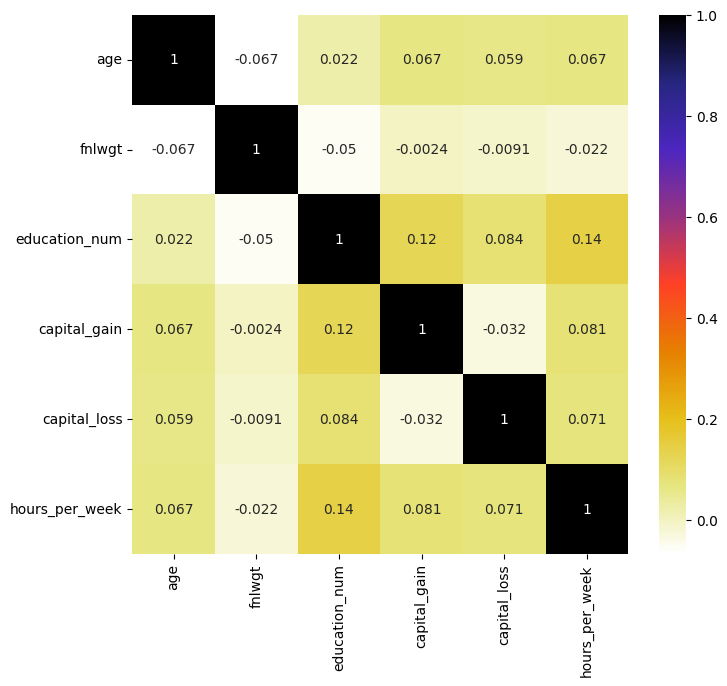

In [35]:
# correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,7))
cor = df.corr(numeric_only=True)
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [38]:
#PPS (Predictive Power Score)
import ppscore as pps

# Calculate the PPS between all pairs of columns, with 'income' as the target variable
pps_matrix = pps.predictors(df, y="income")  # Specify the target column

# Display the PPS matrix
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,capital_gain,income,3.032382e-01,classification,True,weighted F1,0.65501,0.759624,DecisionTreeClassifier()
1,education,income,2.481925e-01,classification,True,weighted F1,0.65501,0.740634,DecisionTreeClassifier()
2,education_num,income,2.481925e-01,classification,True,weighted F1,0.65501,0.740634,DecisionTreeClassifier()
3,capital_loss,income,1.563308e-01,classification,True,weighted F1,0.65501,0.708942,DecisionTreeClassifier()
4,workclass,income,1.057998e-01,classification,True,weighted F1,0.65501,0.691510,DecisionTreeClassifier()
5,hours_per_week,income,4.807290e-03,classification,True,weighted F1,0.65501,0.656668,DecisionTreeClassifier()
6,native_country,income,2.253506e-04,classification,True,weighted F1,0.65501,0.655087,DecisionTreeClassifier()
7,marital_status,income,1.278514e-07,classification,True,weighted F1,0.65501,0.655010,DecisionTreeClassifier()
8,occupation,income,1.278514e-07,classification,True,weighted F1,0.65501,0.655010,DecisionTreeClassifier()
9,relationship,income,1.278514e-07,classification,True,weighted F1,0.65501,0.655010,DecisionTreeClassifier()


In [39]:
# Comparison Summary:
'''
# 1. Correlation matrix reveals linear relationships between numerical features,
while PPS assesses the predictive power of features for the target variable.
# 2. Correlation might show strong relationships that are not predictive, whereas PPS focuses on how well a feature predicts the target.
# 3.  Correlation coefficients are symmetrical, but PPS scores are directional,
showing the predictive power of feature X for feature Y, but not the reverse.
# 4. PPS provides a more comprehensive understanding of feature importance for predictive modeling,
while the correlation matrix is mainly for numerical features.
# 5. Comparing both methods helps identify features important for prediction,
while also considering possible collinearity issues from the correlation matrix.
'''

'\n# 1. Correlation matrix reveals linear relationships between numerical features,\nwhile PPS assesses the predictive power of features for the target variable.\n# 2. Correlation might show strong relationships that are not predictive, whereas PPS focuses on how well a feature predicts the target.\n# 3.  Correlation coefficients are symmetrical, but PPS scores are directional,\nshowing the predictive power of feature X for feature Y, but not the reverse.\n# 4. PPS provides a more comprehensive understanding of feature importance for predictive modeling,\nwhile the correlation matrix is mainly for numerical features.\n# 5. Comparing both methods helps identify features important for prediction,\nwhile also considering possible collinearity issues from the correlation matrix.\n'